## Solving Differential Equations

In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [310]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50
num_neurons = 100

In [311]:
# Training Data
# train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
#                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_X = np.asarray(range(10))
num_points  = train_X.shape[0]

In [312]:
print(train_X, n_samples )

[0 1 2 3 4 5 6 7 8 9] 10


In [313]:
rng.randn(10)

array([ 0.43228141, -0.37952156, -0.20753178, -0.61607032,  0.15370645,
        0.1958765 ,  0.17068549, -0.14509082, -1.67022678,  0.6717864 ])

In [314]:
# tf Graph Input
X = tf.placeholder("float", shape=(num_points))
S = tf.placeholder("float", shape=([num_neurons,num_points]) )
S1_S = tf.placeholder("float", shape=([num_neurons,num_points]) )
VW = tf.placeholder("float", shape=([num_neurons,num_points]) )
Y = tf.placeholder("float", shape=(num_points))
dYdX = tf.placeholder("float", shape=(num_points))

# Set model weights
# W = tf.Variable(rng.randn(num_neurons), name="weight", dtype=tf.float32)
# U = tf.Variable(rng.randn(num_neurons), name="bias", dtype=tf.float32)
# V = tf.Variable(rng.randn(num_neurons), name="scale", dtype=tf.float32)

W = tf.Variable(np.arange(num_neurons), name="weight", dtype=tf.float32)
U = tf.Variable(np.arange(num_neurons), name="bias", dtype=tf.float32)
V = tf.Variable(np.arange(num_neurons), name="scale", dtype=tf.float32)

Define some convinient variables/placeholders, to simplify the cost expression

In [334]:
# S = tf.reshape( tf.multiply( tf.reshape(W , [1,num_neurons]),  tf.reshape(X, [num_points,1]) ), [num_points*num_neurons] )
S = tf.nn.sigmoid( tf.multiply( tf.reshape(W , [1,num_neurons]),  tf.reshape(X, [num_points,1]) ) )  
S1_S = tf.multiply(S , (1-S)) 
VW = tf.multiply(V,W)
VW_cast = tf.reshape( tf.tile( VW , [num_points] ) , [num_points, num_neurons] )
V_cast =  tf.reshape( tf.tile( V , [num_points] ) , [num_points, num_neurons] )
Y = tf.matmul( S, tf.transpose( V_cast ) )[:,0]
dYdX =  tf.matmul( S1_S, tf.transpose(VW_cast) ) [:,0]

To parametrize unknow function y

$$
y_j = \sum_i V_i S(W_i X_j + U_i)
$$

The result I want to get is $dy/dx + y$, which becomes

$$
(dy/dx + y)_i = \sum_i V_i W_i S(W_i X_j + U_i) ( 1- S(W_i X_j + U_i) ) + \sum_i V_i S(W_i X_j + U_i)
$$

To achieve this, I have to understand the broadcasting in tensorflow.

In [335]:
init_test = tf.global_variables_initializer()

with tf.Session() as sess_test:
    
    sess_test.run(init_test)
    
    print( "S = ", sess_test.run(S, feed_dict={X:train_X} ) , '\n\n')
    print( "S1_S = ", sess_test.run( S1_S  , feed_dict={X:train_X} ) ,'\n\n')
    print( "VW = ", sess_test.run( VW  , feed_dict={X:train_X} ) ,'\n\n')
    print( "VW_cast = ", sess_test.run( VW_cast  , feed_dict={X:train_X} ) ,'\n\n')
    print("V_cast = ", sess_test.run( V_cast  , feed_dict={X:train_X} ) ,'\n\n')
    print( "S1_S. VW_cast = ", sess_test.run( tf.matmul( S1_S, tf.transpose(VW_cast) )  , feed_dict={X:train_X} ) , '\n\n')
    print( "sliced ", sess_test.run(  tf.matmul( S1_S, tf.transpose(VW_cast) ) [:,0]   , feed_dict={X:train_X} ) , '\n\n') # Access the first column of the tensorl
    print( "dYdX = ",  sess_test.run( dYdX, feed_dict={X:train_X}  ) , '\n\n')
    print( "Y = ",  sess_test.run( Y, feed_dict={X:train_X}  ) )

S =  [[ 0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5         0.5         0.5         0.5
   0.5         0.5         0.5         0.5     

V_cast =  [[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99.]
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.

In [336]:
# Construct a linear model
# pred = tf.add(tf.multiply(tf.square(X), W), b)
# pred = tf.multiply(  tf.nn.sigmoid( tf.add(tf.multiply( X, W), b) ) , v )

pred =  dYdX + Y

In [337]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred , 2))/( 2 * n_samples )
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [338]:
# Initializing the variables
init = tf.global_variables_initializer()

Optimization Finished!
Training cost =  6.26877e+13 
 W= [    0.           -22.84692574   -40.5670433    -59.82318115   -79.87911224
  -100.21247101  -120.55120087  -140.82675171  -161.04534912  -181.22714233
  -201.38825989  -221.53871155  -241.68383789  -261.82650757  -281.96807861
  -302.10903931  -322.24984741  -342.390625    -362.53125     -382.671875
  -402.8125      -422.953125    -443.09375     -463.234375    -483.375
  -503.515625    -523.65625     -543.796875    -563.9375      -584.078125
  -604.21875     -624.359375    -644.5         -664.640625    -684.78125
  -704.921875    -725.0625      -745.203125    -765.34375     -785.484375
  -805.625       -825.765625    -845.90625     -866.046875    -886.1875
  -906.328125    -926.46875     -946.609375    -966.75        -986.890625
 -1007.03125    -1027.171875   -1047.3125     -1067.453125   -1087.59375
 -1107.734375   -1127.875      -1148.015625   -1168.15625    -1188.296875
 -1208.4375     -1228.578125   -1248.71875    -1268.8593

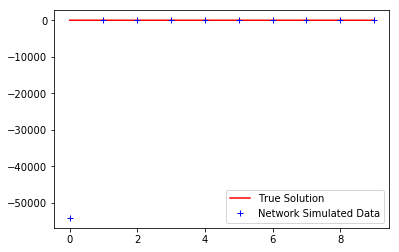

In [339]:
with tf.Session() as sess:
    
    sess.run(init)
    
    sess.run(optimizer, feed_dict = {X: train_X})


    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X})
    print("Training cost = ", training_cost, "\n W=", sess.run(W), "\n U=", sess.run(U),"\n V=", sess.run(V), '\n\n')
    
    print( sess.run(Y, feed_dict={X:train_X}) )
    
    plt.plot(train_X, np.exp(-train_X), 'r-', label = 'True Solution' )
    
    plt.plot(train_X, sess.run(Y, feed_dict={X:train_X}), 'b+', label='Network Simulated Data')
    
    plt.legend()
    plt.show()